# DATASET : 311_Customer_Service_Requests_Analysis
# PACKAGES/MODULES USED : NUMPY, PANDAS, MATPLOTLIB, SEABORN, DATETIME, SCIPY

# --------------------------------------------------------------------------------------------------------------

# <u>Solution :

# 1. Importing the Dataset and doing Data Preprocessing on the dataset

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
import datetime

from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [2]:
# reading the dataset
# Note: Our Dataset is very large so setting low_memory to false
dataset = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', low_memory = False)

In [3]:
# View the top 5 elements of the dataset
dataset.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
# shape of the dataset
dataset.shape

(300698, 53)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

#### There are a lot of columns in our dataset but I don't need all of them. So I will drop the columns that have a very large number of null values in it. Also I don't need the unnecessary columns, so I will drop them.

In [6]:
# viewing the columns
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

- Columns with most of its values as null are dropped
- Agency and Agency Name are more or less same, so I am dropping Agency Name
- Dropping other unnecessary columns like Location, Incident Adrress, Street Name, X Coordinate (State Plane), Y Coordinate (State Plane)  as we are already considering LATITUDE and LONGITUDE
- Dropping other unnecessary columns

In [7]:
# dropping the irrelevant columns
drop_columns = ['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1',
'Intersection Street 2','Address Type','Park Facility Name','Park Borough','School Name',
'School Number','School Region','School Code','School Phone Number','School Address','School City',
'School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type',
'Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Landmark',
'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date','Resolution Action Updated Date','Community Board','Facility Type',
'Location']

dataset = dataset.drop(drop_columns, axis=1)

In [8]:
# checking the shape of our dataset
dataset.shape

(300698, 14)

#### So we are upto 14 columns from 53...That's a lot of reduction !

- ### Now check for null values, data type of the columns etc.

In [9]:
# checking the info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unique Key              300698 non-null  int64  
 1   Created Date            300698 non-null  object 
 2   Closed Date             298534 non-null  object 
 3   Agency                  300698 non-null  object 
 4   Complaint Type          300698 non-null  object 
 5   Descriptor              294784 non-null  object 
 6   Location Type           300567 non-null  object 
 7   Incident Zip            298083 non-null  float64
 8   City                    298084 non-null  object 
 9   Status                  300698 non-null  object 
 10  Resolution Description  300698 non-null  object 
 11  Borough                 300698 non-null  object 
 12  Latitude                297158 non-null  float64
 13  Longitude               297158 non-null  float64
dtypes: float64(3), int64

In [10]:
# checking the number of null values in the columns
dataset.isnull().sum()

Unique Key                   0
Created Date                 0
Closed Date               2164
Agency                       0
Complaint Type               0
Descriptor                5914
Location Type              131
Incident Zip              2615
City                      2614
Status                       0
Resolution Description       0
Borough                      0
Latitude                  3540
Longitude                 3540
dtype: int64

In [11]:
# choosing the closed cases only to eliminate the null values

dataset = dataset[dataset['Status'] == 'Closed']

In [12]:
dataset.isnull().sum()

Unique Key                   0
Created Date                 0
Closed Date                  0
Agency                       0
Complaint Type               0
Descriptor                5903
Location Type               65
Incident Zip               507
City                       506
Status                       0
Resolution Description       0
Borough                      0
Latitude                  1432
Longitude                 1432
dtype: int64

In [13]:
# since all the cases are of closed cases we can now drop the column Status as every value of its data are same
dataset = dataset.drop(['Status'], axis = 1)

In [14]:
dataset.shape

(298471, 13)

In [15]:
# out of the remaining columns only Descriptor, Latitude and Longitude has over 1k null values
dataset = dataset[(dataset['Descriptor'].notnull()) & (dataset['Latitude'].notnull()) &(dataset['Longitude'].notnull())]

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291204 entries, 0 to 300697
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unique Key              291204 non-null  int64  
 1   Created Date            291204 non-null  object 
 2   Closed Date             291204 non-null  object 
 3   Agency                  291204 non-null  object 
 4   Complaint Type          291204 non-null  object 
 5   Descriptor              291204 non-null  object 
 6   Location Type           291149 non-null  object 
 7   Incident Zip            291164 non-null  float64
 8   City                    291164 non-null  object 
 9   Resolution Description  291204 non-null  object 
 10  Borough                 291204 non-null  object 
 11  Latitude                291204 non-null  float64
 12  Longitude               291204 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 31.1+ MB


In [16]:
# rechecking remaining null values
dataset.isnull().sum()

Unique Key                 0
Created Date               0
Closed Date                0
Agency                     0
Complaint Type             0
Descriptor                 0
Location Type             55
Incident Zip              40
City                      40
Resolution Description     0
Borough                    0
Latitude                   0
Longitude                  0
dtype: int64

In [17]:
# still there are few null values in our dataset. we will remove them
dataset = dataset[(dataset['Location Type'].notnull()) & (dataset['Incident Zip'].notnull()) &(dataset['City'].notnull())]

# rechecking for null values
dataset.isnull().sum()

Unique Key                0
Created Date              0
Closed Date               0
Agency                    0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
City                      0
Resolution Description    0
Borough                   0
Latitude                  0
Longitude                 0
dtype: int64

-- So all Null values are removed from our dataset

In [18]:
# checking the shape our datset
dataset.shape

(291107, 13)

# 2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)

In [19]:
# converting 'Created Date' and 'Closed Date' to datetime datatype

cols = ['Created Date', 'Closed Date']
for col in cols:
    dataset[col] = pd.to_datetime(dataset[col],infer_datetime_format=True)
    
# creating a new column Request_Closing_Time
dataset['Request_Closing_Time'] = dataset[cols[1]] - dataset[cols[0]]

# viewing the info to see the data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291107 entries, 0 to 300697
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Unique Key              291107 non-null  int64          
 1   Created Date            291107 non-null  datetime64[ns] 
 2   Closed Date             291107 non-null  datetime64[ns] 
 3   Agency                  291107 non-null  object         
 4   Complaint Type          291107 non-null  object         
 5   Descriptor              291107 non-null  object         
 6   Location Type           291107 non-null  object         
 7   Incident Zip            291107 non-null  float64        
 8   City                    291107 non-null  object         
 9   Resolution Description  291107 non-null  object         
 10  Borough                 291107 non-null  object         
 11  Latitude                291107 non-null  float64        
 12  Longitude       

# 3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

In [20]:
# applying describe on the dataset
dataset.describe()

,Unique Key,Incident Zip,Latitude,Longitude,Request_Closing_Time
count,2.911070e+05,291107.000000,291107.000000,291107.000000,291107
mean,3.130158e+07,10857.977349,40.725681,-73.925035,0 days 04:18:32.132665995
std,5.753777e+05,580.280774,0.082411,0.078654,0 days 06:03:45.509089128
min,3.027948e+07,83.000000,40.499135,-74.254937,0 days 00:01:00
25%,3.079934e+07,10314.000000,40.668926,-73.970957,0 days 01:16:30
50%,3.130675e+07,11209.000000,40.717782,-73.930774,0 days 02:42:38
75%,3.179091e+07,11238.000000,40.782973,-73.875788,0 days 05:20:24
max,3.231065e+07,11697.000000,40.912869,-73.700760,24 days 16:52:22


In [21]:
# viewing the columns
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time'],
      dtype='object')

### We will analyse Agency, Complaint Type, Descriptor, Location Type, City, Borough 

In [22]:
# All the complaints are under the same agency
dataset['Agency'].value_counts()

NYPD    291107
Name: Agency, dtype: int64

In [23]:
# complaint types
dataset['Complaint Type'].value_counts()

Blocked Driveway            76676
Illegal Parking             74021
Noise - Street/Sidewalk     47747
Noise - Commercial          35144
Derelict Vehicle            17506
Noise - Vehicle             16868
Animal Abuse                 7744
Traffic                      4466
Noise - Park                 3927
Vending                      3773
Drinking                     1270
Noise - House of Worship      920
Posting Advertisement         647
Disorderly Youth              285
Graffiti                      113
Name: Complaint Type, dtype: int64

<AxesSubplot:title={'center':'Complaint Types'}, ylabel='Count'>

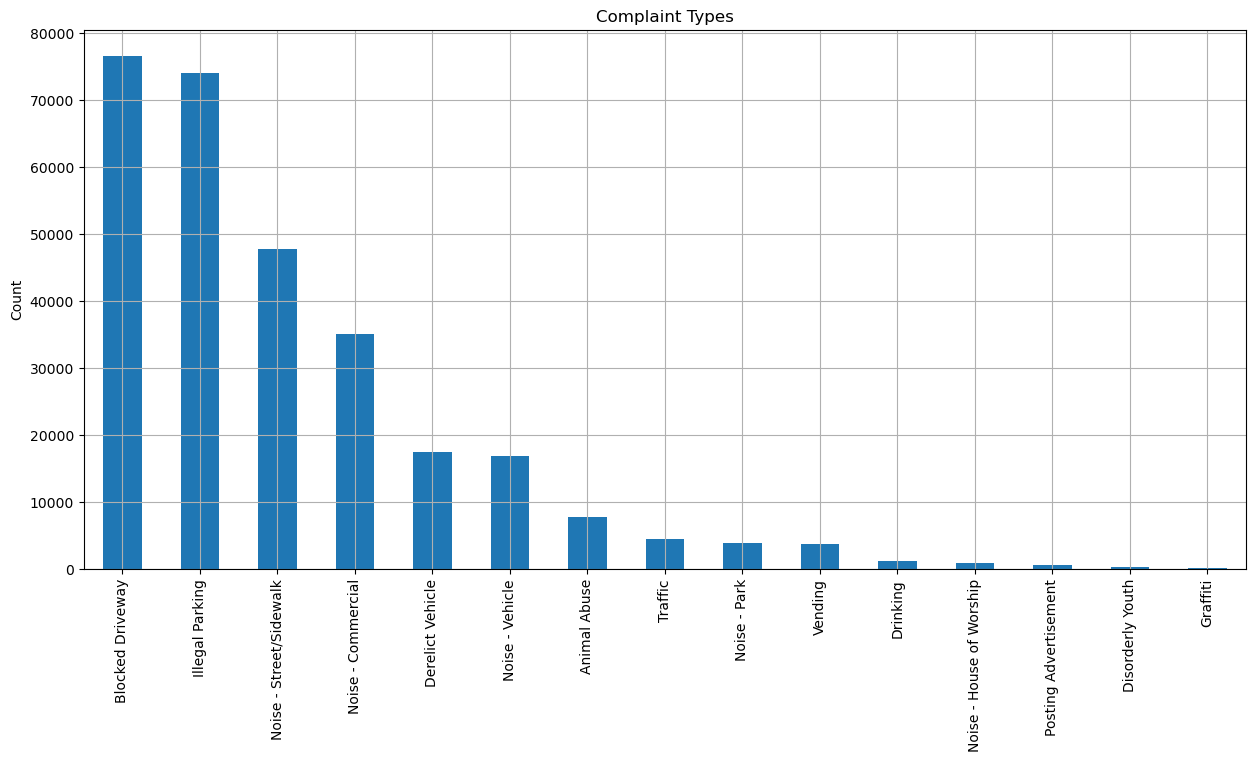

In [24]:
# plotting the complaint types
dataset['Complaint Type'].value_counts().plot(kind = 'bar', figsize=(15, 7), title='Complaint Types', ylabel='Count', grid=True)

- so <b>Blocked Driveway</b> is the Maximum Complaint type followed by Illegal Parking, Noise-Street/Sidewalk, Noise-Commercial

In [25]:
# Descriptors
dataset['Descriptor'].value_counts()

Loud Music/Party                  60444
No Access                         56725
Posted Parking Sign Violation     22103
Loud Talking                      21254
Partial Access                    19951
With License Plate                17506
Blocked Hydrant                   15837
Commercial Overnight Parking      11908
Car/Truck Music                   11114
Blocked Sidewalk                  10930
Double Parked Blocking Traffic     5558
Double Parked Blocking Vehicle     4147
Engine Idling                      4134
Banging/Pounding                   4090
Neglected                          3771
Car/Truck Horn                     3477
Congestion/Gridlock                2736
In Prohibited Area                 2017
Other (complaint details)          1961
Unlicensed                         1756
Overnight Commercial Storage       1746
Unauthorized Bus Layover           1333
Truck Route Violation              1010
In Public                           923
Tortured                            849


<AxesSubplot:title={'center':'Top 10 Descriptors'}>

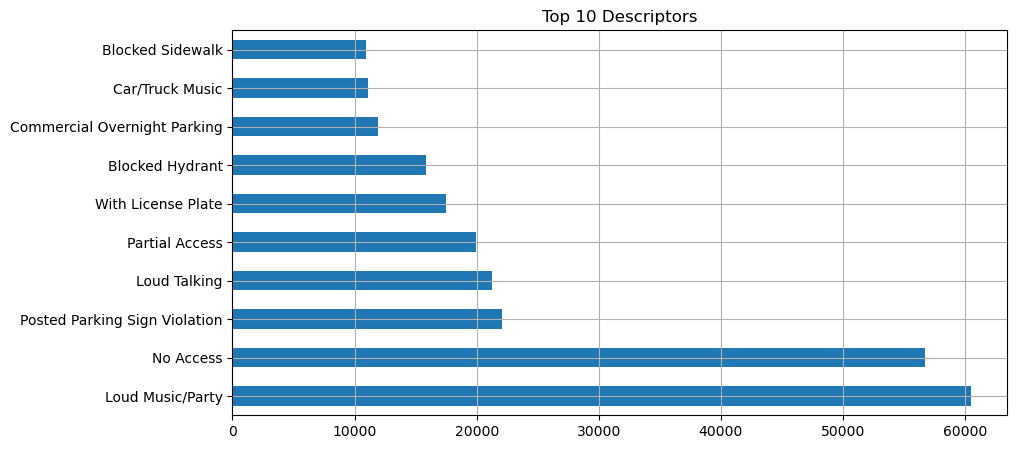

In [26]:
# plotting top 10 Descriptors
dataset['Descriptor'].value_counts().head(10).plot(kind='barh', grid=True, figsize=(10,5), title='Top 10 Descriptors')

- So <b>Loud Music/Party</b> is the <u>maximum</u> descriptor for the complaints followed by No Access, Posted Parking Sign Violation and Loud Taking.

In [27]:
# Top 10 Location Type
dataset['Location Type'].value_counts().head(10)

Street/Sidewalk               242765
Store/Commercial               19425
Club/Bar/Restaurant            17172
Residential Building/House      5753
Park/Playground                 4246
House of Worship                 920
Residential Building             226
Highway                          196
Parking Lot                      116
House and Store                   93
Name: Location Type, dtype: int64

<AxesSubplot:title={'center':'Top 10 Location Type'}>

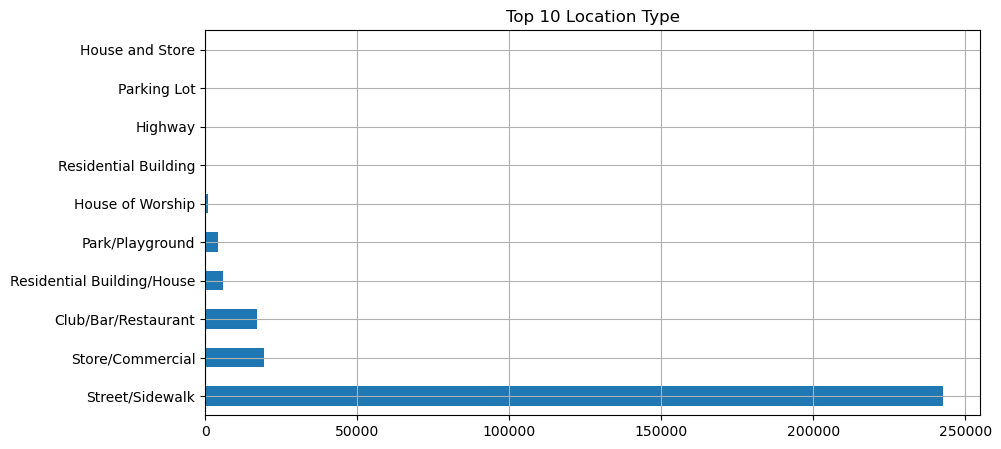

In [28]:
# plotting Top 10 Location Type
dataset['Location Type'].value_counts().head(10).plot(kind='barh', grid=True, figsize=(10, 5), title='Top 10 Location Type')

- So we see that the Location Type of <b>Street/Sidewalk</b> is a lot more than any other members of its category

In [29]:
# City
dataset['City'].value_counts().head(10)

BROOKLYN         96858
NEW YORK         61935
BRONX            40216
STATEN ISLAND    12211
JAMAICA           7155
ASTORIA           6254
FLUSHING          5916
RIDGEWOOD         5124
CORONA            4265
WOODSIDE          3493
Name: City, dtype: int64

Text(0.5, 0, 'Complaint Counts')

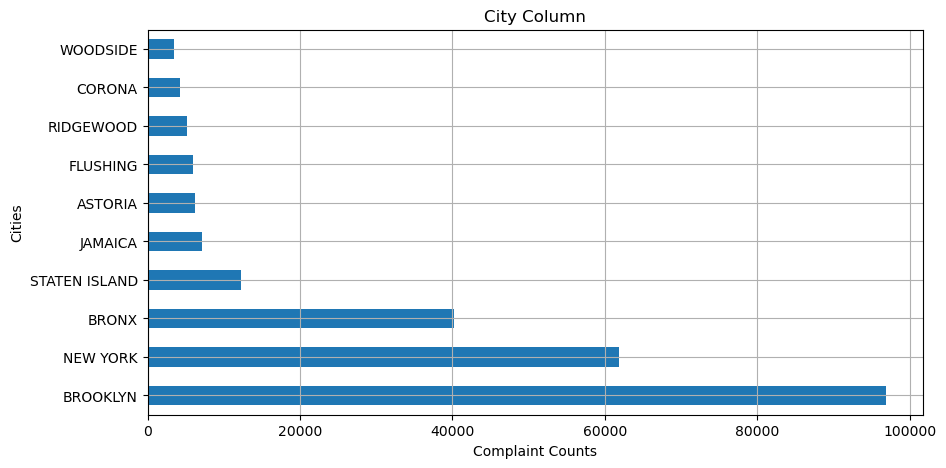

In [30]:
# plotting the cities
dataset['City'].value_counts().head(10).plot(kind='barh', grid=True, figsize=(10, 5), title='City Column', ylabel='Cities')
plt.xlabel('Complaint Counts')

- So most complaints are from <b>BROOKLYN</b> followed New York, Bronx, Staten Island in City wise

Text(0.5, 0, 'Complaint Counts')

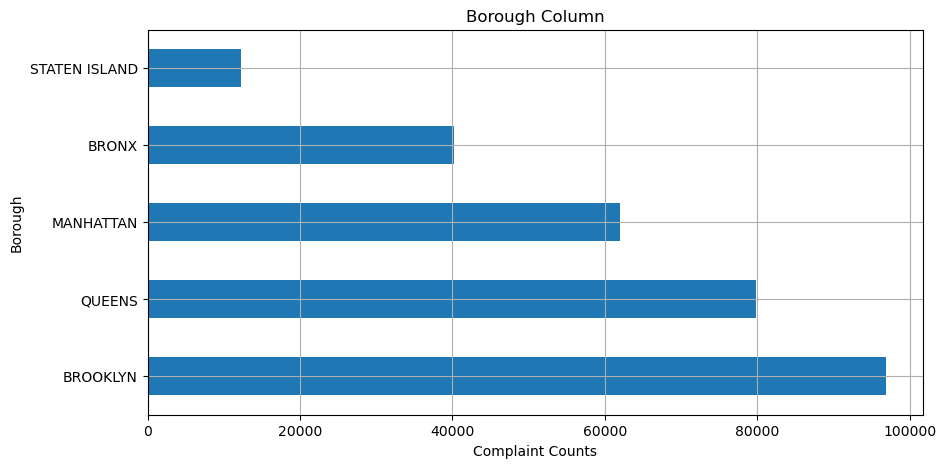

In [31]:
# Borough
dataset['Borough'].value_counts().head(10).plot(kind='barh', grid=True, figsize=(10, 5), title='Borough Column', ylabel='Borough')
plt.xlabel('Complaint Counts')

- So most complaints are from <b>BROOKLYN</b> followed Queens, Manhattan, Bronx and Staten Island in Borough wise

### Till now we only analyse one column. Lets analyse Borough and Complaint Types

- Borough per Complaint Type

In [32]:
# Top Complaints
top_6_complaints = dataset['Complaint Type'].value_counts()[:6].keys()
top_6_complaints

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle', 'Noise - Vehicle'],
      dtype='object')

In [33]:
# Borough per Complaints
borough_complaints = dataset.groupby(['Borough', 'Complaint Type']).size().unstack()
borough_complaints = borough_complaints[top_6_complaints]
borough_complaints

Complaint Type,Blocked Driveway,Illegal Parking,Noise - Street/Sidewalk,Noise - Commercial,Derelict Vehicle,Noise - Vehicle
Borough,,,,,,
BRONX,12740,7829,8864,2431,1948,3385
BROOKLYN,28119,27386,13315,11451,5164,5145
MANHATTAN,2055,11981,20362,14528,530,5374
QUEENS,31621,21944,4391,6057,8102,2608
STATEN ISLAND,2141,4881,815,677,1762,356


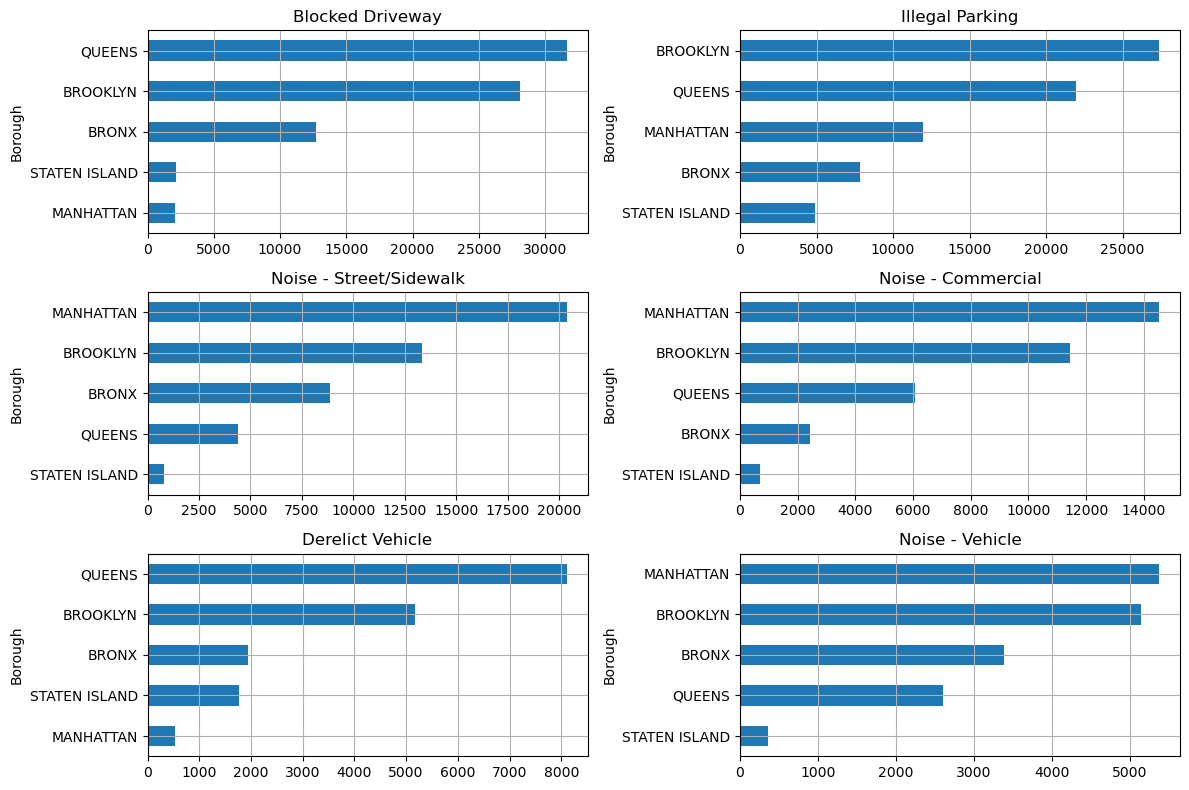

In [34]:
# Plotting Borough per Complaint Type 
col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,8))

for i, (label,col) in enumerate(borough_complaints.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax, grid=True)
    ax.set_title(label)
    
plt.tight_layout()

<u>ANALYSIS:</u>
    
    - Blocked Driveway is maximum in QUEENS
    - Illegal Parking is maximum in BROOKLYN
    - Noise - Street/Sidewalk is maximum in MANHATTAN
    - Noise - Commercial is maximum in MANHATTAN
    - Derelict Vehicle is maximum in QUEENS
    - Noise - Vehicle is maximum in QUEENS


- Similarly for Complaints per Borough

In [35]:
# similarly for Complaints per Borough
top_borough = dataset['Borough'].value_counts().keys()

complaint_per_borough = dataset.groupby(['Complaint Type', 'Borough']).size().unstack()
complaint_per_borough = complaint_per_borough[top_borough]
complaint_per_borough

Borough,BROOKLYN,QUEENS,MANHATTAN,BRONX,STATEN ISLAND
Complaint Type,,,,,
Animal Abuse,2390,1874,1511,1412,557
Blocked Driveway,28119,31621,2055,12740,2141
Derelict Vehicle,5164,8102,530,1948,1762
Disorderly Youth,72,59,68,63,23
Drinking,257,357,294,187,175
Graffiti,43,37,22,9,2
Illegal Parking,27386,21944,11981,7829,4881
Noise - Commercial,11451,6057,14528,2431,677
Noise - House of Worship,338,297,189,79,17


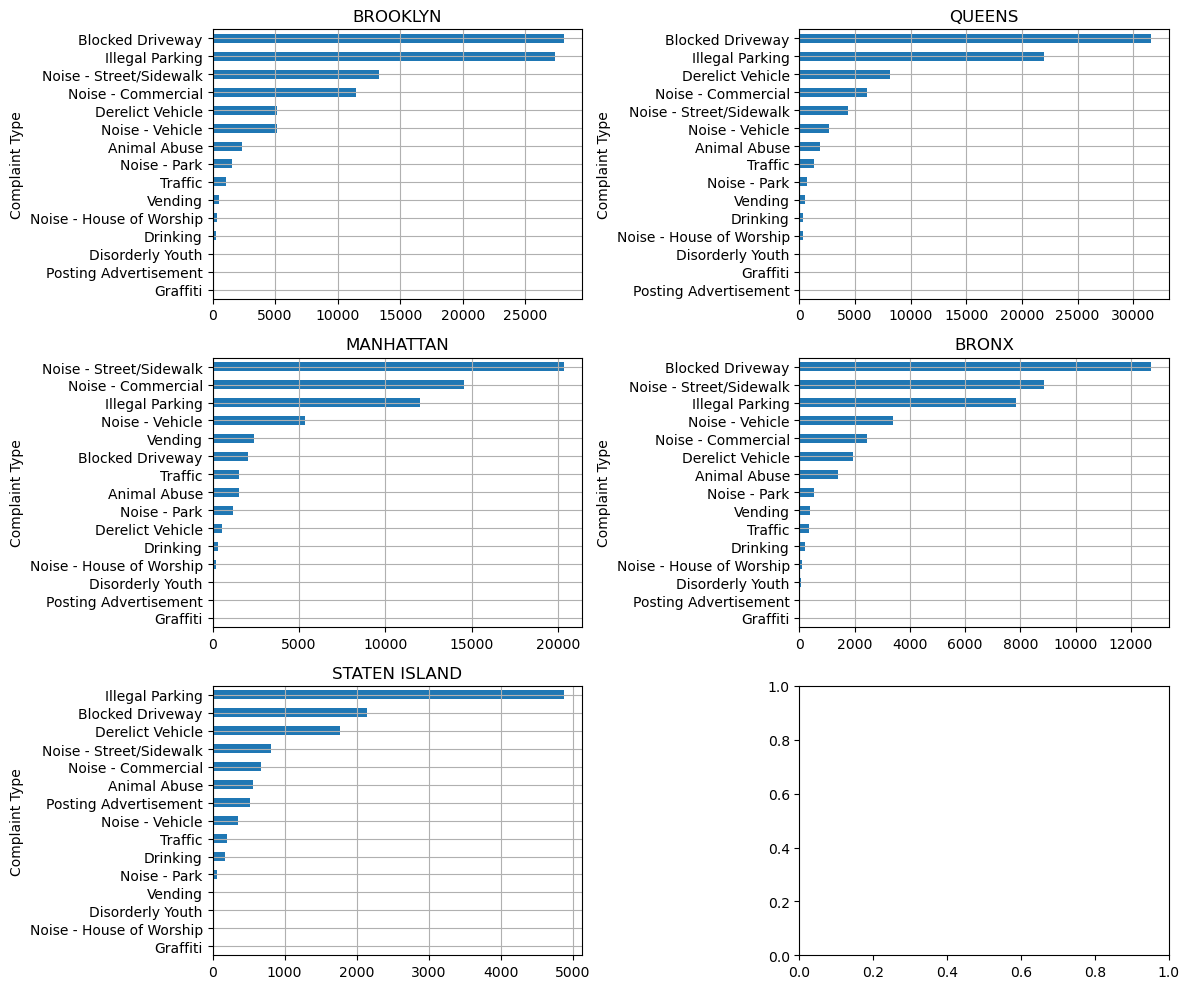

In [36]:
# Plotting Complaints per Borough
col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,10))

for i, (label,col) in enumerate(complaint_per_borough.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax, grid=True)
    ax.set_title(label)
    
plt.tight_layout()

<u>ANALYSIS:</u>

    - BROOKLYN, QUEENS and BRONX has most complaints of Blocked Driveway.
    - MANHATTAN has most complaints of Noise - Street/Sidewalk.
    - STATEN ISLAND has most complaints of Illegal Parking.

# 4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

- Our data in Request_Closing_Time has format of days-hour-minute-seconds. Since calculating or operating canbe a tedious process, to make our work easier we first will convert our Request_Closing_Time from days to number of hours. This will make the data calculation or operation easier.
<br><br>
- Since, converting 2:30 hours to timedelta64[h] will give 2 hours, hence we will add 1 and will say that this particular request was closed within 3 hours.
- Then we will find out the mean and standard distribution of the data.

In [37]:
# Creating a column Request_Closing_Time_in_Hours for time in Hours
# and we will say the said complaint has been closed under x hours
dataset['Request_Closing_Time_in_Hours'] = dataset['Request_Closing_Time'].astype('timedelta64[h]')+1

# viewing the Two columns side by side for first 20 entries
dataset[['Request_Closing_Time', 'Request_Closing_Time_in_Hours']].head(20)

,Request_Closing_Time,Request_Closing_Time_in_Hours
0,0 days 00:55:15,1.0
1,0 days 01:26:16,2.0
2,0 days 04:51:31,5.0
3,0 days 07:45:14,8.0
4,0 days 03:27:02,4.0
5,0 days 01:53:30,2.0
6,0 days 01:57:28,2.0
7,0 days 01:47:55,2.0
8,0 days 08:33:02,9.0
9,0 days 01:23:02,2.0


In [38]:
#  Ordering the complaint types based on the average ‘Request_Closing_Time’ in Hours, grouping them for different locations.
data_avg_time_in_hrs = dataset.groupby(['City', 'Complaint Type'])['Request_Closing_Time_in_Hours'].mean()
data_avg_time_in_hrs.head(10)

City     Complaint Type          
ARVERNE  Animal Abuse                2.631579
         Blocked Driveway            3.028571
         Derelict Vehicle            3.407407
         Disorderly Youth            4.000000
         Drinking                    1.000000
         Graffiti                    2.000000
         Illegal Parking             2.827586
         Noise - Commercial          3.000000
         Noise - House of Worship    2.090909
         Noise - Park                1.500000
Name: Request_Closing_Time_in_Hours, dtype: float64

In [39]:
# Creating a column Request_Closing_Time_in_Seconds for time in seconds
dataset['Request_Closing_Time_in_Seconds'] = dataset['Request_Closing_Time'].astype('timedelta64[s]')

# viewing the Three columns side by side
dataset[['Request_Closing_Time', 'Request_Closing_Time_in_Hours','Request_Closing_Time_in_Seconds']].head()

,Request_Closing_Time,Request_Closing_Time_in_Hours,Request_Closing_Time_in_Seconds
0,0 days 00:55:15,1.0,3315.0
1,0 days 01:26:16,2.0,5176.0
2,0 days 04:51:31,5.0,17491.0
3,0 days 07:45:14,8.0,27914.0
4,0 days 03:27:02,4.0,12422.0


In [40]:
#  Order the complaint types based on the average ‘Request_Closing_Time’ in seconds, grouping them for different locations.
data_avg_in_seconds = dataset.groupby(['City', 'Complaint Type']).Request_Closing_Time_in_Seconds.mean()
data_avg_in_seconds.head(10)

City     Complaint Type          
ARVERNE  Animal Abuse                 7753.052632
         Blocked Driveway             9093.485714
         Derelict Vehicle            10685.592593
         Disorderly Youth            12928.500000
         Drinking                      859.000000
         Graffiti                     5520.000000
         Illegal Parking              8338.913793
         Noise - Commercial           8234.000000
         Noise - House of Worship     5623.909091
         Noise - Park                 4620.000000
Name: Request_Closing_Time_in_Seconds, dtype: float64

- <u>Other analysis works on Time

In [41]:
# lets analyse the Request_Closing_Time
dataset['Request_Closing_Time'].describe()

count                       291107
mean     0 days 04:18:32.132665995
std      0 days 06:03:45.509089128
min                0 days 00:01:00
25%                0 days 01:16:30
50%                0 days 02:42:38
75%                0 days 05:20:24
max               24 days 16:52:22
Name: Request_Closing_Time, dtype: object

In [42]:
# Taking the mean and Standard
mean_hrs = dataset['Request_Closing_Time_in_Hours'].mean()
std_hrs = dataset['Request_Closing_Time_in_Hours'].std()

mean_seconds = dataset['Request_Closing_Time_in_Seconds'].mean()
std_seconds = dataset['Request_Closing_Time_in_Seconds'].std()

print('The mean hours is {0:.2f} hours and mean Secondsis {1:.2f} seconds'.format(mean_hrs, mean_seconds))
print('The standard hours is {0:.2f} hours and standard Seconds is {1:.2f} seconds'.format(std_hrs, std_seconds))

The mean hours is 4.82 hours and mean Secondsis 15512.13 seconds
The standard hours is 6.06 hours and standard Seconds is 21825.51 seconds


### We will now analyse Complaint Types column on the basis of <u>Months</u> by refering to <u>Created Date</u>

In [43]:
# for analysing on the basis of month we will need to separate months from Created Date column
dataset['Year-Month'] = dataset['Created Date'].apply(lambda x:datetime.datetime.strftime(x, '%Y-%m'))


In [44]:
# viewing the months that we have in our dataset
dataset['Year-Month'].unique()

array(['2015-12', '2015-11', '2015-10', '2015-09', '2015-08', '2015-07',
       '2015-06', '2015-05', '2015-04', '2015-03'], dtype=object)

- Looks like we have incident complaints from <b>March</b> to <b>December</b>

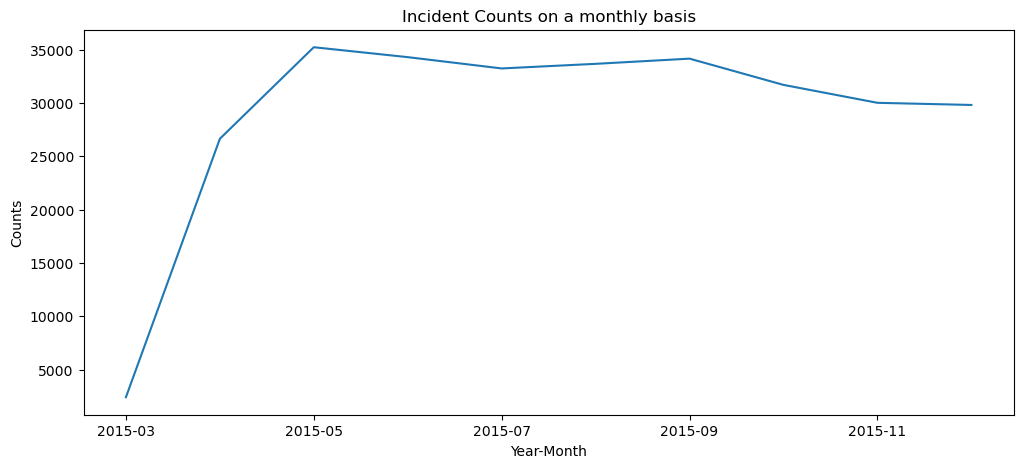

In [45]:
# plotting the month column
#dataset['Year-Month'].value_counts().plot()
monthly_incidents =  dataset.groupby('Year-Month').size().plot(figsize=(12,5),
                                                               title='Incident Counts on a monthly basis', ylabel='Counts')

- Are <b>January</b> and <b>Ferbruary</b> does not have any Complaints? Looks like nobody wants to go out in cold weather....😉
- We don't have any complaints from <b>January</b> and <b>Ferbruary</b> in our dataset because we might have eliminated them as <b>Null Values</b> earlier.

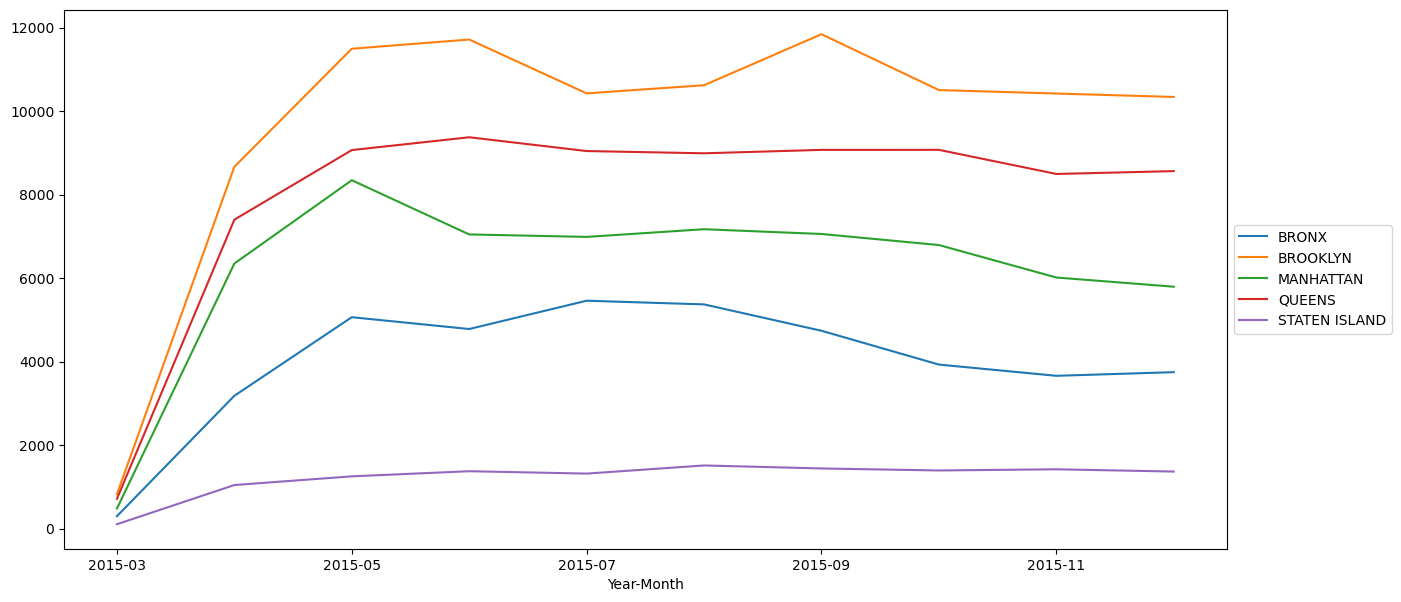

In [46]:
# plotting Borough on the basis of Year-Month
dataset.groupby(['Year-Month','Borough']).size().unstack().plot(figsize=(15,7))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

- <b>BROOKLYN</b> raised most cases all over and most of them were raised in <b>MAY-JUNE</b> and <b>SEPTEMBER</b>.

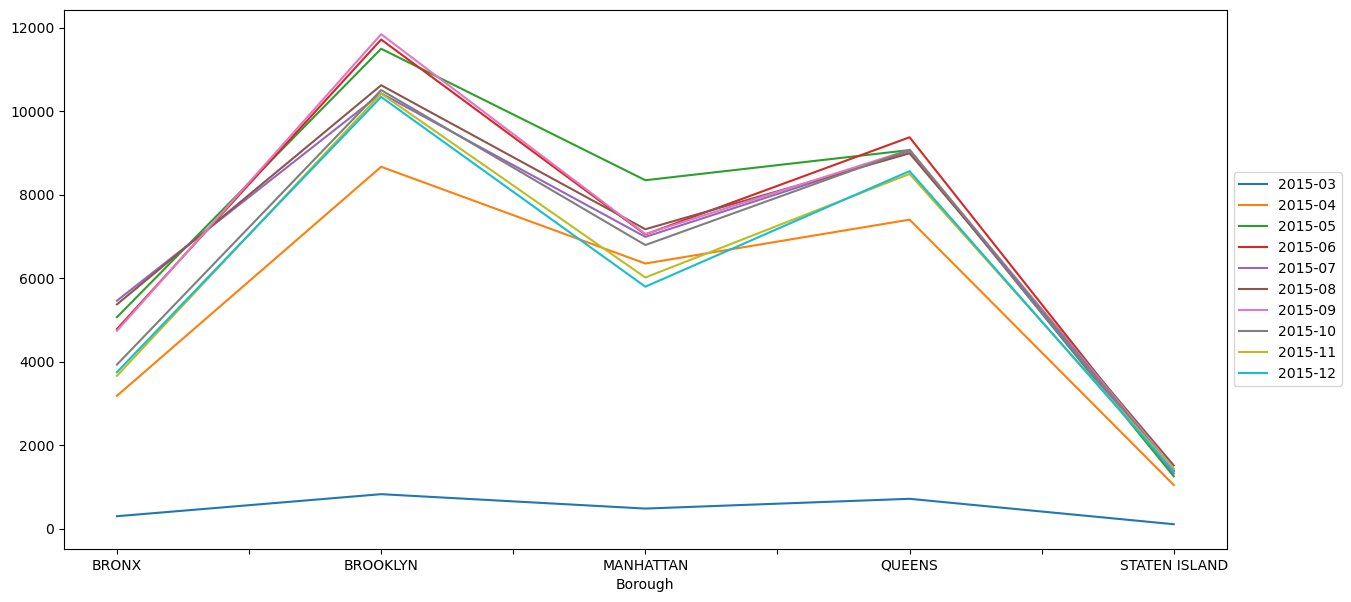

In [47]:
# Plotting Year-Month on the basis of Borough
dataset.groupby(['Borough', 'Year-Month']).size().unstack().plot(figsize=(15,7))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

- <b>DECEMBER</b> has raised least complaints.

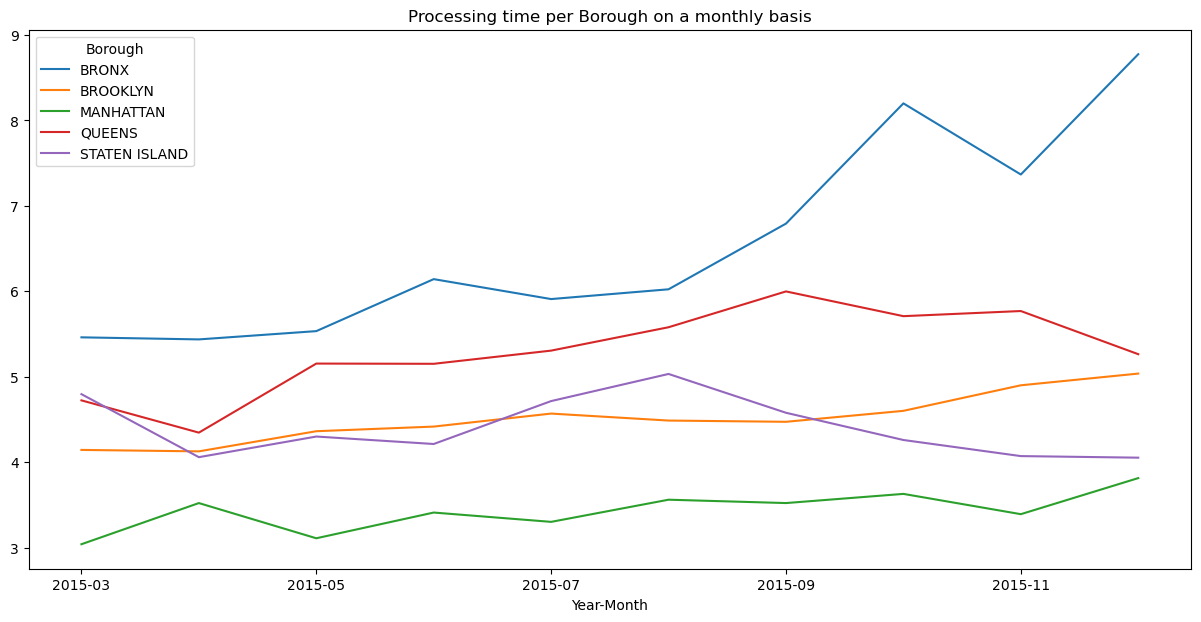

In [48]:
# Processing time per Borough on a monthly basis
dataset.groupby(['Year-Month','Borough'])['Request_Closing_Time_in_Hours'].mean().unstack().plot(figsize=(15,7),
                                                                        title='Processing time per Borough on a monthly basis');

- <b>BRONX</b> has the maximum Processing time every month even though it has the least complaints.


# 5. Perform a statistical test for the following:
### Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.


## a. Whether the average response time across complaint types is similar or not (overall)
## b. Are the type of complaint or service requested and location related?

In [49]:
# viewing the columns
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time', 'Request_Closing_Time_in_Hours',
       'Request_Closing_Time_in_Seconds', 'Year-Month'],
      dtype='object')

In [50]:
# lets see the average response time in seconds for different complaint types
avg_response_time = dataset.groupby(['Complaint Type']).Request_Closing_Time_in_Seconds.mean().sort_values(ascending=True)
avg_response_time

Complaint Type
Posting Advertisement        7113.582689
Noise - Commercial          11294.078335
Noise - House of Worship    11519.116304
Noise - Park                12249.610644
Noise - Street/Sidewalk     12392.210610
Traffic                     12426.186968
Disorderly Youth            12847.733333
Noise - Vehicle             12953.606711
Drinking                    13885.939370
Vending                     14442.301617
Illegal Parking             16140.427217
Blocked Driveway            17056.511751
Animal Abuse                18786.728951
Graffiti                    25744.504425
Derelict Vehicle            26450.507426
Name: Request_Closing_Time_in_Seconds, dtype: float64

- <b>Null Hypothesis</b> -->>  Average response time across complaint types is similar(overall).
- <b>Alternate Hypothesis</b> -->> Average response time across complaint types is not similar(overall).

-- We can say that for overall case our <b>NULL HYPOTHESIS</b> is rejected as the Average Response Time in Seconds for different complaint types is different

# Testing for our Hypothesis

- Below We conduct ANOVA (Analysis of Variance) test for top 5 type of complaints

- For a 95% of confidence interval we choose our alpha as 0.05 for 5%

- Alpha(0.05) is the critical p-value, if our calculated p-value is less than alpha, it will give us strong evidence to reject Null Hypothesis.
>
- <b>if p < alpha(0.05) <b>: Reject Null Hypothesis, Average response time for all the complaints type is not same.</b>

- <b>if p > alpha(0.05) : Fail to reject Null Hypothesis, Average response time for all the complaints type is same.</b>

In [51]:
# to calculate the p-value log of time taken to close the complaint per complaint is taken
data = {}
for complaint in dataset['Complaint Type'].unique():
    data[complaint] = np.log(dataset[dataset['Complaint Type']==complaint]['Request_Closing_Time_in_Seconds'])

In [52]:
data.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth'])

In [53]:
for complaint in data.keys():
    print(data[complaint].std())

1.1029853481161118
0.9759835331364468
1.07759350645833
1.2579717580716774
1.0889851891911977
1.1764769203426566
1.2223658746794284
1.0766368282265082
1.0439938309706467
1.1124255292109804
1.183766057955533
1.0462752311468753
1.119443436237754
1.0644915295126962
1.0383245818152775


In [54]:
# importing f_oneway from scipy.stats library
from scipy.stats import f_oneway
# taking top 5 complaints
stat, p = f_oneway(data['Blocked Driveway'], data['Illegal Parking'], data['Noise - Street/Sidewalk'],
                   data['Derelict Vehicle'], data['Noise - Commercial'])
print('Statistics= %.3f, p = %.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('We have Different distributions (reject H0)')

Statistics= 2452.471, p = 0.000
We have Different distributions (reject H0)


- <b>As our p-value is quite low , hence it is being converted to 0.0</b>

- Since our p-value is lower than our critical p-value, we will conclude that we have enough evidence to reject our Null Hypothesis and that is:

- Average response time for all the complaints type is not same.

### For relation between Complaint Type and Location
we will use Crosstab and Chi-square Test

In [55]:
# getting crosstab from pandas
city_type = pd.crosstab(dataset['City'], dataset['Complaint Type'])

In [56]:
# viewing first 5 entries of city_type
city_type.head()

Complaint Type,Animal Abuse,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Posting Advertisement,Traffic,Vending
City,,,,,,,,,,,,,,,
ARVERNE,38,35,27,2,1,1,58,2,11,2,29,7,0,0,1
ASTORIA,125,2618,351,3,35,4,1065,1282,19,61,385,204,1,47,54
Astoria,0,116,12,0,0,0,213,261,0,0,114,0,0,0,0
BAYSIDE,37,376,198,1,1,3,511,40,2,3,15,16,0,9,2
BELLEROSE,7,95,89,2,1,0,105,37,1,1,13,10,1,7,0


In [57]:
# Now we will do Chi-square Test

In [58]:
# contigency table
table = city_type 
# table -->> The contingency table. The table contains the observed frequencies (i.e. number of occurrences) in each category.
# stat -->> chi2 or Test Statistic
# p -->> The p-value of the Test
# dof -->> Degrees of Freedom
# expected -->> The expected frequencies, based on the marginal sums of the table.
stat, p, dof, expected = chi2_contingency(table)

In [59]:
print('The Degrees of Freedom are : {}'. format(dof))
print('The P-Value of the Testing is {}: '.format(p))
print('Expected values : \n')
print(expected)

The Degrees of Freedom are : 728
The P-Value of the Testing is 0.0: 
Expected values : 

[[5.69280711e+00 5.63664357e+01 1.28690962e+01 2.09510592e-01
  9.33608604e-01 8.30691120e-02 5.44146791e+01 2.58352290e+01
  6.76314895e-01 2.88683542e+00 3.51000079e+01 1.24000866e+01
  4.75625801e-01 3.28306774e+00 2.77362619e+00]
 [1.66368298e+02 1.64726957e+03 3.76090317e+02 6.12280021e+00
  2.72840571e+01 2.42763657e+00 1.59023086e+03 7.55016458e+02
  1.97648287e+01 8.43657418e+01 1.02577313e+03 3.62383838e+02
  1.38998306e+01 9.59453534e+01 8.10572813e+01]
 [1.90469621e+01 1.88590505e+02 4.30573500e+01 7.00979365e-01
  3.12366243e+00 2.77932169e-01 1.82060328e+02 8.64393642e+01
  2.26281058e+00 9.65875778e+00 1.17437410e+02 4.14881401e+01
  1.59134614e+00 1.09844696e+01 9.27998296e+00]
 [3.22947095e+01 3.19760995e+02 7.30050600e+01 1.18853205e+00
  5.29626563e+00 4.71242533e-01 3.08688881e+02 1.46560598e+02
  3.83666487e+00 1.63767206e+01 1.99118736e+02 7.03444163e+01
  2.69817627e+00 1.8624

In [60]:
# interpreting test statistics
prob = 0.95 # as aplha is considered 0.05
critical_value = chi2.ppf(prob, dof)
critical_value

791.8799091140163

In [61]:
print('Probability = {}, Critical Value = {}, Test statistic = {}'.format(prob, critical_value, stat))
print()
if abs(stat) >= critical_value:
    print('Dependent (Reject H0 or Null Hypothesis)')
else:
    print('Independent (Failed to reject Null Hypothesis)')


# interpreting the P-Value
alpha = 1 - prob
print('Significance : %.3f, P-Value : %.2f'%(alpha, p))
if p <= alpha:
    print('Dependent (Reject H0 or Null Hypothesis)')
else:
    print('Independent (Failed to reject Null Hypothesis)')

Probability = 0.95, Critical Value = 791.8799091140163, Test statistic = 105247.14233091185

Dependent (Reject H0 or Null Hypothesis)
Significance : 0.050, P-Value : 0.00
Dependent (Reject H0 or Null Hypothesis)


# --------------------------------------------------------------------------------------------------------------

# Thank You